In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import time
import gzip
import shutil, os, sys
from os.path import dirname
import json

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [3]:
current_dir = (os.getcwd())
parent_dir = (dirname(os.getcwd()))

sys.path.append(parent_dir )

    
mymods = ['plot_functions']
for mymod in mymods:
    if mymod in sys.modules: 
        del sys.modules[mymod]

from plot_functions import *



In [4]:
fname = '{0}/params.json'.format(current_dir)
all_params = json.load(open(fname))


In [5]:
start = time.time()
core_file = '/'.join([current_dir,  'sim.pklz' ]) 
f = gzip.open(core_file,'rb')
sim = pickle.load(f) 
f.close()  
time.time() - start

sim = pd.Series(sim)


Text(0.5,1,'Hydrograph')

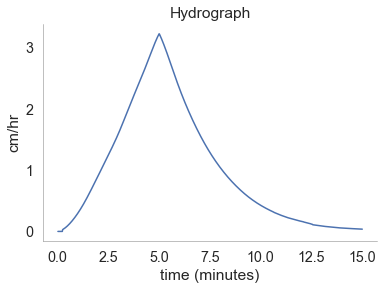

In [6]:
plt.plot(sim['t_h']/60., sim['hydro']*3.6e3)
plt.xlabel('time (minutes)')
plt.ylabel('cm/hr')
plt.title('Hydrograph')
# plt.legend()
# plt.ylim(0, 1)

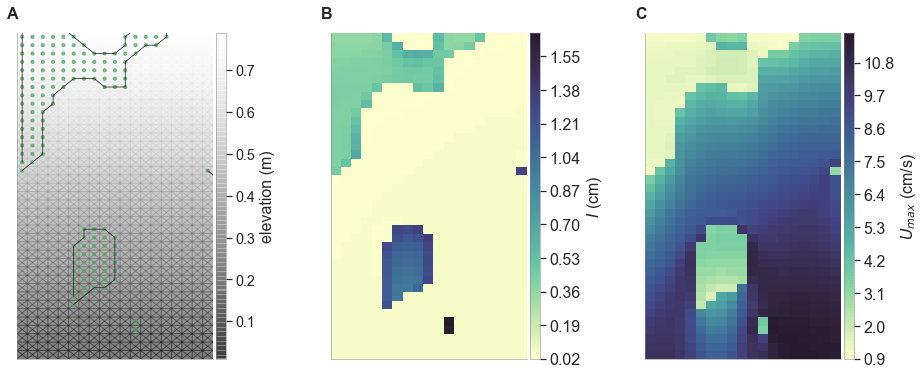

In [7]:
fig = plt.figure(figsize= (15,6))
plt.subplots_adjust(wspace = 0.5)

for i, label in enumerate(('A', 'B', 'C')):
    ax = plt.subplot(1,3,i+1)
    ax.text(-0.05, 1.08, label, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top')


ax1 = plt.subplot(131)
color_topo(sim.zc, ax = ax1, dx = sim.dx)
veg_points(sim.isvegc, dx  = sim.dx, ax = ax1)
plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

ax1 = plt.subplot(132)

zinflplot = colormap(sim,sim['zinflc'], ax = ax1, clabel= '$I$ (cm)', colorbar = True ,
                     cfontsize = 16, cround = 2)
# # plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

# ax = plt.subplot(133)
zinflplot = colormap(sim,sim['vmax'], ax = ax, clabel= r'$U_{max}$ (cm/s)' ,colorbar = True, cfontsize = 16,
                     cround = 1, veg_scale=False)


In [13]:
sim.infl.shape

(16,)

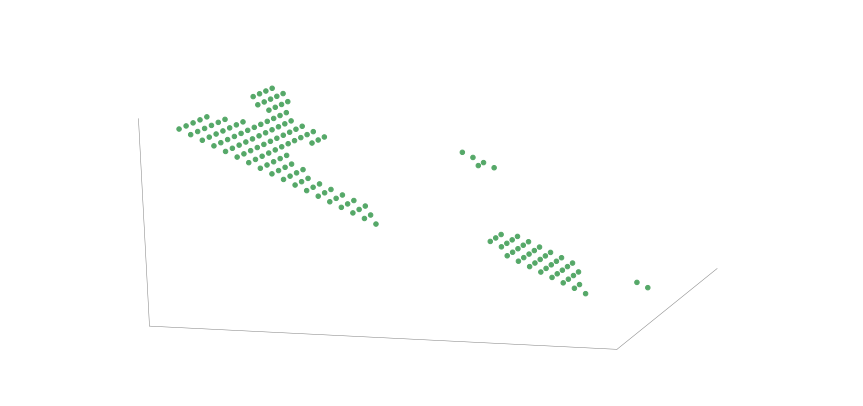

In [8]:
### Here is a 3D plot, for illustration only

fig = plt.figure( figsize = (15, 7))
ax = fig.add_subplot(111, projection='3d')

# Get rid of colored axes planes
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.set_xticks([], []);
ax.set_zticks([], []);
ax.set_yticks([], []);
# plt.axis('off')
ax.grid(False)

#Plot the surface with face colors taken from the array we made.
norm = plt.Normalize()
colors = cm.Greens(norm(sim.isvegc ))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

im = ax.scatter(sim.xc[ sim.isvegc == 1], sim.yc[ sim.isvegc == 1] ,sim.yc[ sim.isvegc == 1],
                 c = 'g',  marker='o',  s = 20, alpha =1 )
 
ax.view_init(20, 195)


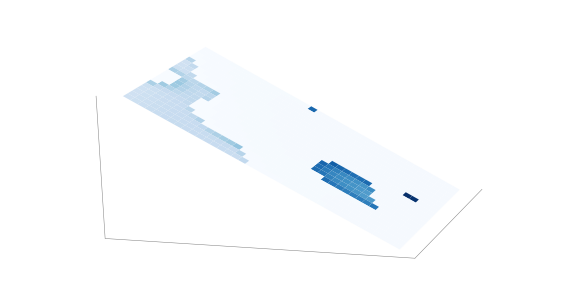

In [9]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure( figsize = (10, 5))
ax = fig.add_subplot(111, projection='3d')
# Get rid of colored axes planes`
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.set_xticks([], []);
ax.set_zticks([], []);
ax.set_yticks([], []);

ax.grid(False)


# # Plot the surface with face colors taken from the array we made.
norm = plt.Normalize()
colors = cm.Blues(norm(sim.zinflc ))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

im = ax.plot_surface(sim.xc, sim.yc+1 ,sim.yc, facecolors = colors , rstride = 1, cstride = 1,
                       linewidth=0,antialiased=True, shade=False)
{}
ax.view_init(25, 195)


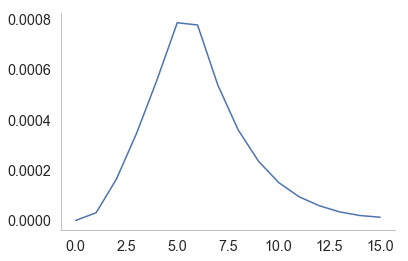

In [14]:
plt.plot(sim.flux1)